En este código se pretende calcular el angulo $\theta$, que corresponde al ángulo entre el momento angular del disco $\bf{\vec{J_{d}}}$ y el momentum angular del Agujero negro $\bf{\vec{J_{bh}}}$. Se pretende determinar la posible relación del $\cos(\theta)$ con la masa del halo $M_{halo}$ y la masa del agujero negro $M_{bh}$.


In [1]:
#librerías
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import gadget 
import arepo

"""
===================================
    ->Lectura de los autovectores
"""

from struct import *
import sys
import os


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/daniel/.local/lib/python3.6/site-packages/gadget-0.1-py3.6-linux-x86_64.egg/gadget/const.py:20: UserWarning: Could not setup constants
  warnings.warn("Could not setup constants")


In [2]:


#DataFolder= '../../Data/groups_015/'
#SnapNumber= 1

#sub = arepo.Subfind('%s/'%(DataFolder), SnapNumber ,combineFiles=True)
#sub = arepo.Subfind('../../Data/groups_015/fof_subhalo_tab_015.0.hdf5' ,combineFiles=True)

In [3]:
#Mass_halo= sub.SubhaloMass*10e10/0.7 
#Masa_bh= sub.SubhaloBHMass*10e10/0.7


#Spin_disk = sub.SubhaloSpin



In [4]:
#print(len(Mass_halo))
#print(len(Masa_bh))
#print(len(Spin_disk))

In [5]:
Sn_bh = gadget.Snapshot('../../Data/snap_015.0.hdf5', parttype=[5])


In [30]:

Spin_bh=Sn_bh.BH_SpinOrientation #Spin de los black hole
r_bh = Sn_bh.Coordinates  # cordanada en x,y,z
Mass_bh = Sn_bh.BH_Mass*10e10/0.7
Mass_halo = Sn_bh.Masses

In [23]:
#print(r[0])
#print(r_bh)
#print(len(r_bh))

In [24]:
#Cargar los datos para 

"""
======================
Lectura de Datos 

    ---> EigenVectores
======================
"""

## Dirección archivos ##
#Direction_eigenvector='../Bolshoi/Eigenvec_s1_1'
#Direction_eigenvalor='../Bolshoi/Eigen_s1_1'


folder = '/home/daniel/Documentos/Tesis/Data/Tweb_512/'
file = 'snap_015.s1.00.eigenvec_1'

print("Reading eigenvector file")
f = open("%s%s"%(folder,file), "rb")
#f = open("../Bolshoi/Eigenvec_s1_1", "rb")
dumb = f.read(38)

dumb = f.read(4)
n_x = f.read(4)
n_y = f.read(4)
n_z = f.read(4)
nodes = f.read(4)
x0 = f.read(4)
y0 = f.read(4)
z0 = f.read(4)
dx = f.read(4)
dy = f.read(4)
dz = f.read(4)
dumb = f.read(4)

n_x = (unpack('i', n_x))[0]
n_y = (unpack('i', n_y))[0]
n_z = (unpack('i', n_z))[0]
nodes = (unpack('i', nodes))[0]
dx = (unpack('f', dx))[0]
dy = (unpack('f', dy))[0]
dz = (unpack('f', dz))[0]
x0 = (unpack('f', x0))[0]
y0 = (unpack('f', y0))[0]
z0 = (unpack('f', z0))[0]
print(n_x, n_y, n_z, nodes, dx, dy, dz)

total_nodes = 3 * n_x * n_y *n_z
dumb = f.read(4)
array_data = f.read(total_nodes*4)
dumb = f.read(4)
format_s = str(total_nodes)+'f'
array_data = unpack(format_s, array_data)
f.close()
array_data  = np.array(array_data)
new_array_data = np.reshape(array_data, (3,n_x,n_y,n_z), order='F')
print("--------------------\n")

#print(new_array_data[:,0,0,0])


Reading eigenvector file
64 64 64 262144 195.3125 390.625 390.625
--------------------



In [25]:
###calcular los autovelores para los radios respectivos

#r=[]
#eigen_vec_r=[]
def Eigen_vec(r):
    """
    Esta funcion retorna el valor del auntoVector 
    correspondiente a las coordenadas r(x,y,z)
    """
        
    long_box= 25e3 #longitud caja
    
    dl = n_x/long_box #tamaño de cada celda = numero_celdas/long_caja
    
    i=np.int(r[0]*dl)
    j=np.int(r[1]*dl)
    k=np.int(r[2]*dl)
    
   
    

    """
    eigen_vec_r =np.array([new_array_data[0,i,j,k],\
                            new_array_data[1,i,j,k],\
                            new_array_data[2,i,j,k]])
    """
    
    eigen_vec_r = [new_array_data[0,i,j,k],\
                            new_array_data[1,i,j,k],\
                            new_array_data[2,i,j,k]]

   
    
    #return r[0],r[1],r[2]
    return eigen_vec_r


In [26]:
print(Eigen_vec(r_bh[5]))

[0.62367087602615356, -0.78894448280334473, 0.1672816276550293]


In [27]:
## asignacion de autovectores con su radio respectivo

Mag_EigenVec=[]
Mag_Spin_bh=[]
Dot=[]
EigenVec=[]
cos_theta=[]
for i in range(len(r_bh)):
    
    #Enviroment=np.append(Enviroment,[Eigen_vec(r_bh[i])])
    #New_enviroment=reshape(Enviroment,(1,n_x))
    EigenVec.append(Eigen_vec(r_bh[i]))
    
    Mag_EigenVec.append(np.linalg.norm(EigenVec[i])) ##magnitud del autovector
    Mag_Spin_bh.append(np.linalg.norm(Spin_bh[i]))       ##magnitud del Spin_bh
    Dot.append(np.vdot(EigenVec[i],Spin_bh[i]))      ##Productopunto del autovec y spin_bh
    cos_theta.append(Dot[i]/(Mag_EigenVec[i]*Mag_Spin_bh[i])) 
    

#print(Mag_Enviroment[0])    

print(cos_theta)

[-0.73588053375433882, -0.87081739701952887, -0.85904618542715794, -0.075785808042858047, -0.20615157749193483, -0.66099808509433655, -0.41908061400982516, -0.66811019574875563, -0.67983009981102061, 0.59086178767465602, 0.43608656518085898, 0.90340880810655633, -0.065958853759430544, -0.89757629849309306, -0.70831665054668913, 0.17882368633347323, 0.66156652536971039, 0.47762926577366815, -0.28080669155708765, -0.89700230472225262, -0.088456553035687446]


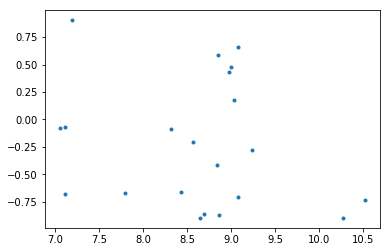

In [33]:
plt.plot(np.log10(Mass_bh),cos_theta,'.')
plt.show()